In [5]:
import pandas as pd
fru = pd.read_csv('fruits.csv')
fru.head(10)

,mass,width,height,fruit_label
0,192,8.4,7.3,1
1,180,8.0,6.8,1
2,176,7.4,7.2,1
3,86,6.2,4.7,2
4,84,6.0,4.6,2
5,80,5.8,4.3,2
6,80,5.9,4.3,2
7,76,5.8,4.0,2
8,178,7.1,7.8,1
9,172,7.4,7.0,1


In [10]:
at = fru[['mass','width','height']].values
tf = fru['fruit_label'].values

from sklearn.model_selection import train_test_split
at_tr,at_ts,tf_tr,tf_ts = train_test_split(at,tf,test_size=0.2,random_state=42)


In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(at_tr,tf_tr)
tf_pr = knn.predict(at_ts)
print(tf_pr)
print(tf_ts)


[2 2 2 2 1 1 1]
[2 2 2 2 1 1 2]


In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(tf_ts,tf_pr)
print(acc)

0.8571428571428571


In [19]:
for i in range(1,25):
    km = KNeighborsClassifier(n_neighbors = i)
    km.fit(at_tr,tf_tr)
    pred = km.predict(at_ts)
    acac = accuracy_score(tf_ts,pred)
    print(i,acac)




1 0.8571428571428571
2 0.8571428571428571
3 0.8571428571428571
4 0.8571428571428571
5 0.8571428571428571
6 0.8571428571428571
7 0.8571428571428571
8 0.8571428571428571
9 0.7142857142857143
10 0.5714285714285714
11 0.7142857142857143
12 0.7142857142857143
13 0.7142857142857143
14 0.7142857142857143
15 0.7142857142857143
16 0.7142857142857143
17 0.7142857142857143
18 0.7142857142857143
19 0.7142857142857143
20 0.7142857142857143
21 0.7142857142857143
22 0.7142857142857143
23 0.7142857142857143
24 0.7142857142857143


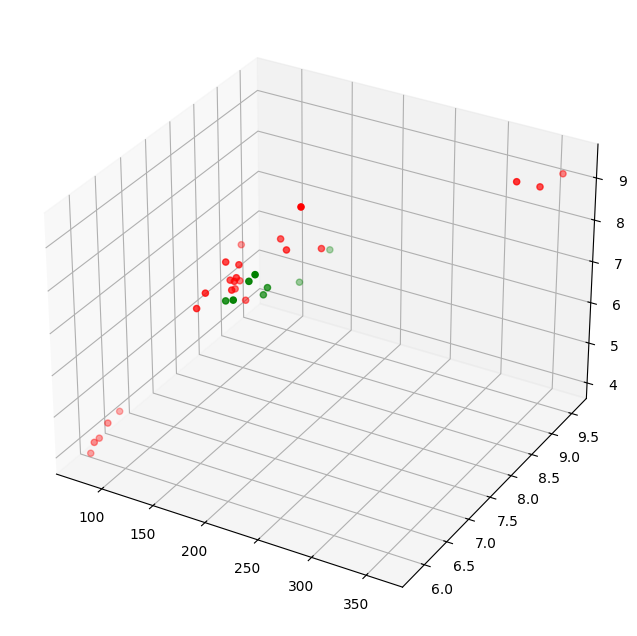

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

for label,colour in zip(fru['fruit_label'].unique(),['green','red']):
    df = fru[fru['fruit_label']== label]
    ax.scatter(df['mass'],df['width'],df['height'],c=colour,label=label)
plt.show()